# Get started with Visual-TCAV

This notebook contains the code to successfully **install** and **run** Visual-TCAV.
<br>
Once installed the required dependencies and downloaded the example datasets and models, we will go through the tutorial with step-by-step execution examples.

## Requirements

To execute this code, you should set up a **virtualenv** or a **conda environment** using **Python** **3.11.5** and Poetry:
```conda create -n "v_tcav_env" python=3.11.5 ipython poetry```.

After that, you can run the cell below to directly install all the dependencies.

In [ ]:
!make install

## Datasets & models

To download the recommended datasets and models please run the script below.

In [ ]:
%run -i datasets_and_models_downloader/datasets_and_models_downloader.py

The script creates a folder structure as follows:

- *VisualTCAV*
	- *cache*
	- *concept_images*
	- *models*
	- *test_images*

The key folders are
- *models*, which store **pretrained Keras models**:
	- *ResNet50V2*;
	- *VGG16*;
	- *InceptionV3*;
	- *ConvNeXt*;
- *concept_images* with subfolders containing **concept images** from **DTD**:
	- *chequered*;
	- *honeycombed*;
	- *striped*;
	- *waffled*;
	- *zigzagged*;
	- *dotted*;
	- *random* (random images from **Imagenet**);
- *test_images*, that includes both test images for the **Local Explainer** and groups of randomly selected test images for the **Global Explainer**:
	- *zebra.jpg*;
	- *crossword_puzzle.jpg*;
	- *honeycomb.jpg*;
	- *waffle_iron.jpg*;
	- ..
	- *zebra* (images from **Imagenet**);
	- *crossword_puzzle* (images from **Imagenet**);
	- *honeycomb* (images from **Imagenet**);
	- *waffle_iron* (images from **Imagenet**);
	- ..
		

## Run the examples

The **Visual-TCAV** code is all contained into the file **_VisualTCAV.py_**, that is designed to optimize the use of your hardware resources.
<br>
It is compatible with **Tensorflow 2.x** and **pretrained Keras networks**. <sup>*</sup>

<sup>* For those requiring backward compatibility, older versions that are compatible with Tensorflow 1.x are also available (**_VisualTCAV_TF1.py_**) on request.</sup>

### Import the dependencies

In [1]:
import sys
sys.dont_write_bytecode = True

# Visual-TCAV
from src.visual_tcav.framework.VisualTCAV import LocalVisualTCAV, GlobalVisualTCAV, Model

# Keras preprocessing functions
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet_v2
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception_v3
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.convnext import preprocess_input as preprocess_convnext


2025-05-14 12:42:29.492475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-14 12:42:29.492515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-14 12:42:29.494117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Local Explainer

In [2]:
# Local Explainer instantiation
local_visual_tcav = LocalVisualTCAV(

	# Image parameters
	test_image_filename = "zebra.jpg",		# Image filename to be explained
	n_classes = 3,							# Number of top predicted classes for which the explanations are computed
	#target_class = "zebra",				# Forces the computation on the specified target class. If present, it overwrites n_classes to 1

	# Explainer parameters
	m_steps = 50,				# Steps used to compute the integrated gradients (higher means more accurate attributions but heavier computations)
	batch_size = 100,			# Number of batches used during the computations on the models (reduce if having oom problems)

	# Model
	#model=Model(
	#	model_name="ResNet50V2",													# Folder containing model files
	#	graph_path_filename="ResNet50V2-architecture-and-weights-compiled.h5",		# Pretrained keras model filename
	#	label_path_filename="ResNet50V2-imagenet-classes.txt",						# Model classes filename
	#	preprocessing_function=preprocess_resnet_v2,								# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	#model=Model(
	#	model_name="InceptionV3",													# Folder containing model files
	#	graph_path_filename="InceptionV3-architecture-and-weights-compiled.h5",		# Pretrained keras model filename
	#	label_path_filename="InceptionV3-imagenet-classes.txt",						# Model classes filename
	#	preprocessing_function=preprocess_inception_v3,								# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	#model=Model(
	#	model_name="VGG16",															# Folder containing model files
	#	graph_path_filename="VGG16-architecture-and-weights-compiled.h5",			# Pretrained keras model filename
	#	label_path_filename="VGG16-imagenet-classes.txt",							# Model classes filename
	#	preprocessing_function=preprocess_vgg16,									# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	model=Model(
		model_name="ConvNeXt",													# Folder containing model files
		graph_path_filename="ConvNeXt-architecture-and-weights-compiled",		# Pretrained keras model filename
		label_path_filename="ConvNeXt-imagenet-classes.txt",					# Model classes filename
		preprocessing_function=preprocess_convnext,									# Pretrained Keras model preprocessig function
		max_examples=500,															# Max number of images used for the CAVs computation
	),

	# Optional folder parameters
	#visual_tcav_dir = "VisualTCAV",					# Default folder
	#test_images_dir = "VisualTCAV/test_images",		# Default test images folder
	#concept_images_dir = "VisualTCAV/concept_images",	# Default concept images folder
	#models_dir = "VisualTCAV/models",					# Default models folder
	#random_images_folder="random",						# Default random images folder

	# Optional cache parameter
	#clear_cache=True,				# Setting this to True causes the model's cache folder deletion

)

#### Run a prediction test

To perform a **prediction test** of the model on the **test image**, you can call the *predict()* function of the **Local Explainer**:

In [3]:
# Print information about the model's predictions
local_visual_tcav.predict().info(num_of_classes=5)

I0000 00:00:1747219362.387101 1384371 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


+-------------------------------------------+
|              Model: ConvNeXt              |
+-----------+------------------+------------+
|   Image   |    Class name    | Confidence |
+-----------+------------------+------------+
| zebra.jpg |      zebra       |    0.92    |
|           |     ostrich      |  0.00078   |
|           |    hartebeest    |  0.00073   |
|           | African_elephant |  0.00056   |
|           |      impala      |  0.00051   |
+-----------+------------------+------------+


#### Get convolutional layers info

To see which **convolutional layers** are available for analysis with the **Local Explainer** of the method, you can call the *info()* function of the *Model* class:

In [4]:
# Print model's name, information, layers
local_visual_tcav.model.info()

+--------------------------------------+
|           Model: ConvNeXt            |
+------------+-------------------------+
| N. classes |          Layers         |
+------------+-------------------------+
|    1000    |  tf.__operators__.add_1 |
|            |  tf.__operators__.add_2 |
|            |  tf.__operators__.add_3 |
|            |  tf.__operators__.add_4 |
|            |  tf.__operators__.add_5 |
|            |  tf.__operators__.add_6 |
|            |  tf.__operators__.add_7 |
|            |  tf.__operators__.add_8 |
|            |  tf.__operators__.add_9 |
|            | tf.__operators__.add_10 |
|            | tf.__operators__.add_11 |
|            | tf.__operators__.add_12 |
|            | tf.__operators__.add_13 |
|            | tf.__operators__.add_14 |
|            | tf.__operators__.add_15 |
|            | tf.__operators__.add_16 |
|            | tf.__operators__.add_17 |
|            | tf.__operators__.add_18 |
|            | tf.__operators__.add_19 |
|            | t

#### Add model layers

To instruct the explainer on which **layers** to analyze, you can use the *setLayers()* function:

In [5]:
# Add layers
local_visual_tcav.setLayers(
	layer_names=[
		# ResNet50V2
		#"conv4_block3_out", "conv4_block4_out", "conv4_block5_out", "conv4_block6_out", "conv5_block1_out", "conv5_block2_out", "conv5_block3_out"
		# InceptionV3
		#"mixed4", "mixed5", "mixed6", "mixed7", "mixed8", "mixed9", "mixed10"
		# VGG16
		#"block3_conv3", "block4_conv1", "block4_conv2", "block4_conv3", "block5_conv1", "block5_conv2", "block5_conv3",
		# ConvNeXt
		"tf.__operators__.add_33", "tf.__operators__.add_34", "tf.__operators__.add_35",
	]
)

#### Add concepts

Similarly, to specify which **concepts** to use for computing the CAVs, you can call the *setConcepts()* function:

In [6]:
# Add concepts
local_visual_tcav.setConcepts(
	concept_names=[
		'striped', 'zigzagged', 'waffled', 'honeycombed', 'chequered', 'dotted',
	]
)

#### Run the Local Explainer

To run a computation, just execute the *explain()* function:

In [7]:
# Run the explainer
local_visual_tcav.explain(
	cache_cav=True,			# Parameter to toggle CAVs caching. The default is True
	cache_random=True,		# Parameter to toggle random activations caching. The default is True
)

Layers: 100%|██████████| 3/3 [02:39<00:00, 53.31s/it]


#### Show the results

Once the explainer has finished its execution, you can call the *plot()* function, that **shows** the **layer-wise explaination**.

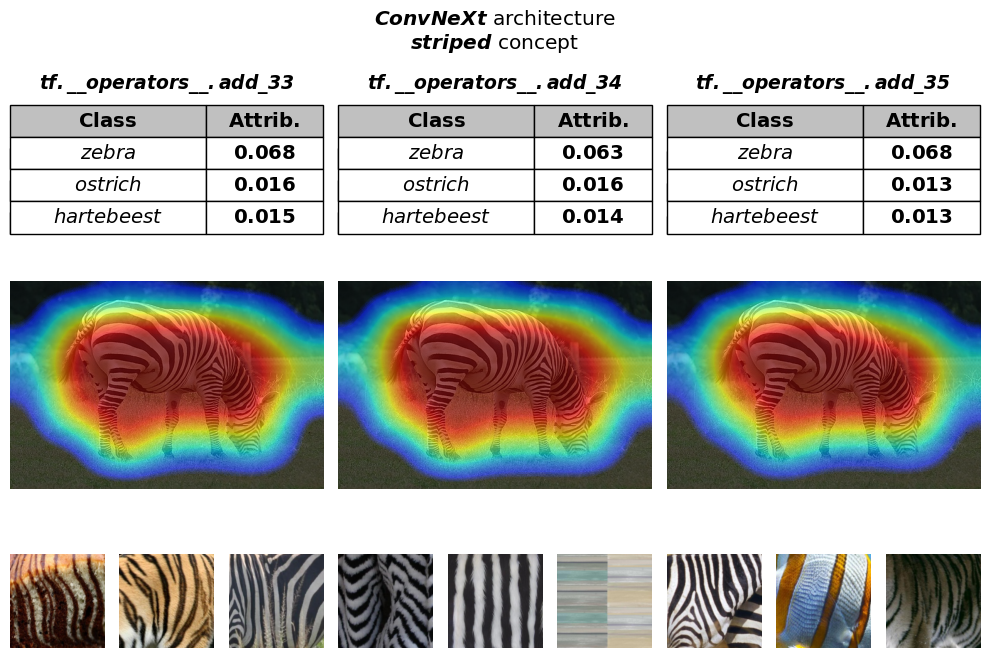

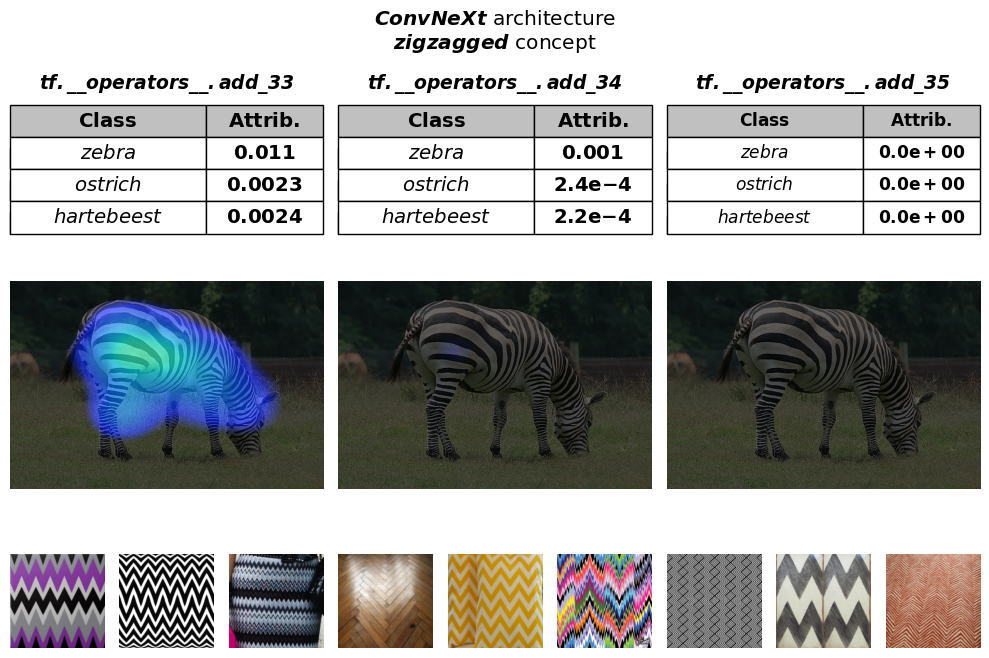

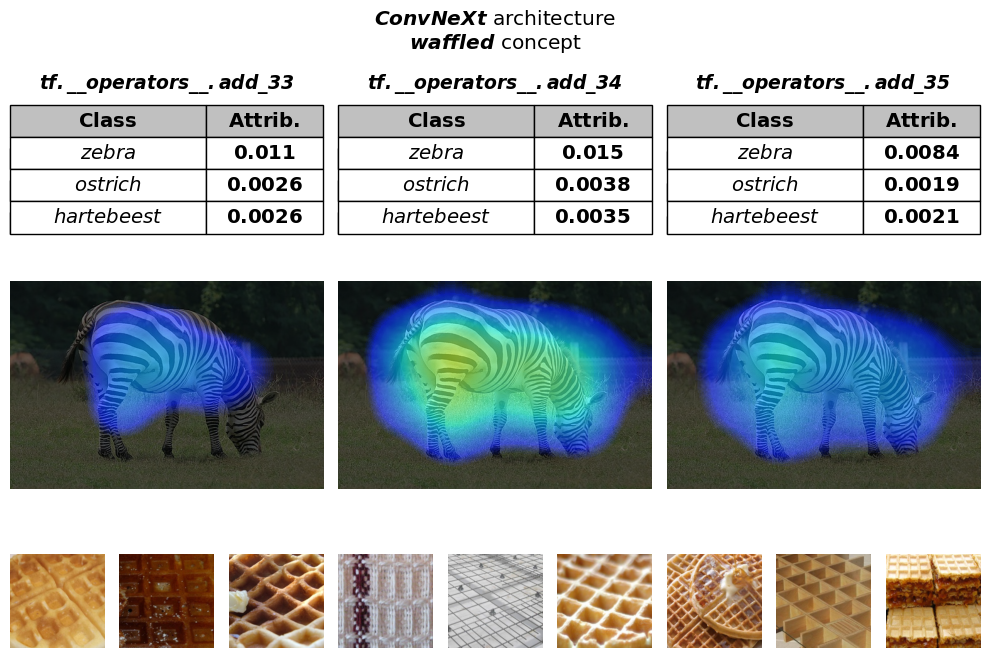

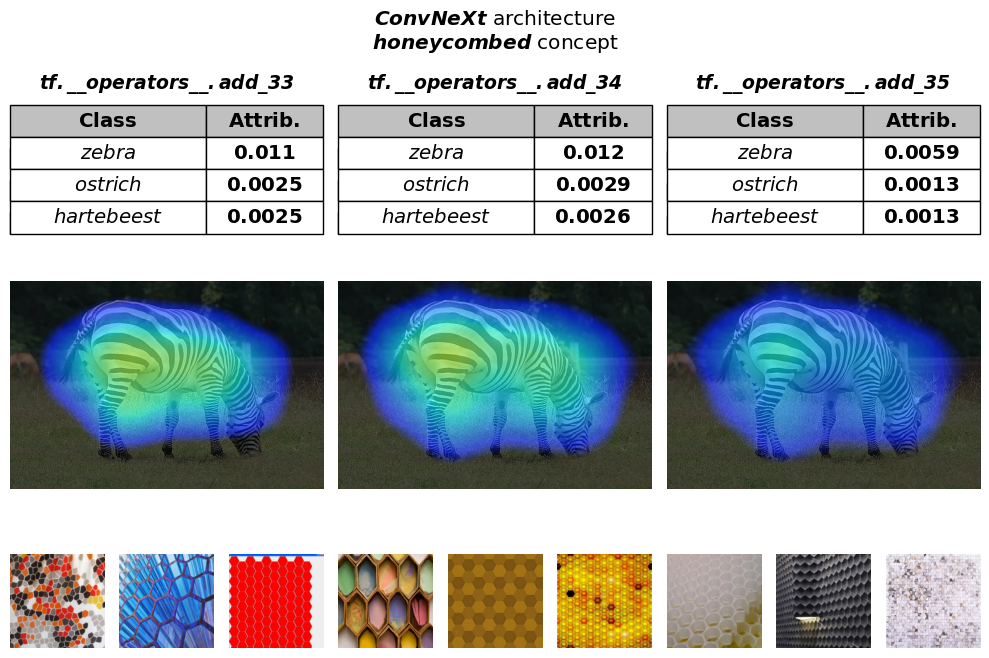

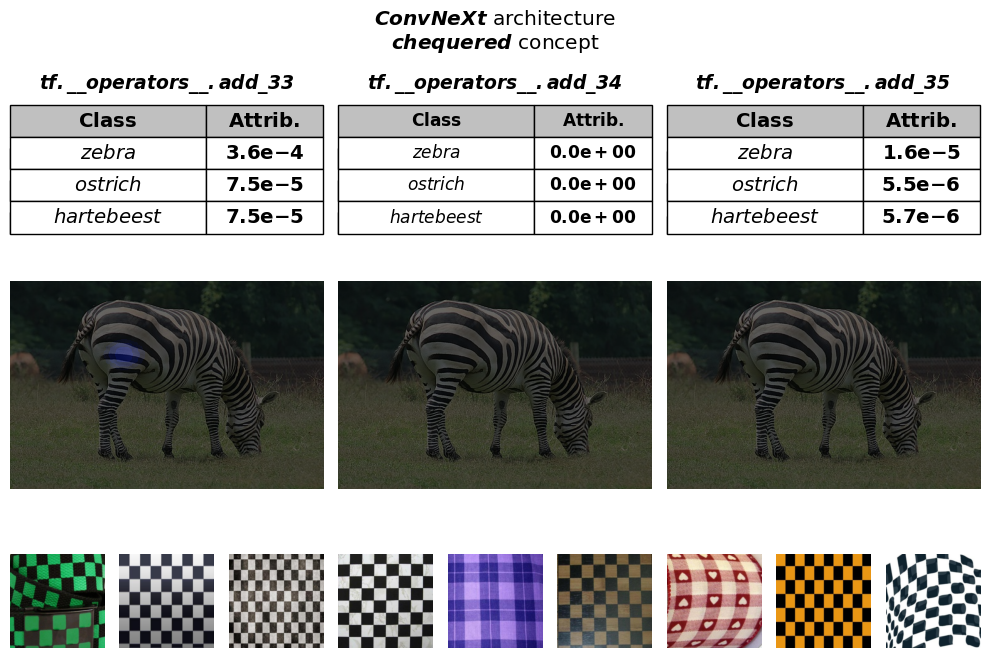

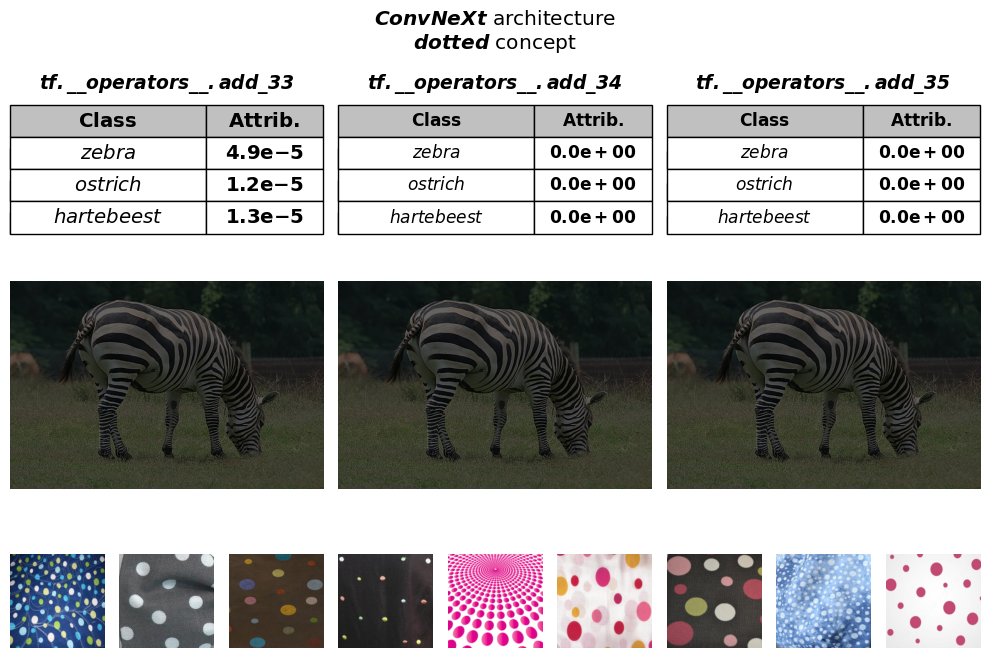

In [8]:
# Plot the Local Explainer
local_visual_tcav.plot()

### Global Explainer

The **Global Explainer** is here illustrated through a series of examples.

This method operates by taking a set of **test images** depicting the selected **class**, some **concept images**, a **pretrained Keras model**, and some other parameters as input.
<br>
It then generates a plot that summarizes the **attribution results** for each **test image**.

#### Instantiate the explainer

We need then to configure the **Global Explainer** with some parameters:

In [9]:
# Global Explainer instantiation
global_visual_tcav = GlobalVisualTCAV(

	# Image parameters
	test_images_folder = "zebra",	# Image filename to be explained
	target_class = "zebra",				# Forces the computation on the specified target class

	# Explainer parameters
	m_steps = 50,				# Steps used to compute the integrated gradients (higher means more accurate attributions but heavier computations)
	batch_size = 20,			# Number of batches used during the computations on the models (reduce if having oom problems)
	
	# Model
	#model=Model(
	#	model_name="ResNet50V2",													# Folder containing model files
	#	graph_path_filename="ResNet50V2-architecture-and-weights-compiled.h5",		# Pretrained keras model filename
	#	label_path_filename="ResNet50V2-imagenet-classes.txt",						# Model classes filename
	#	preprocessing_function=preprocess_resnet_v2,								# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	#model=Model(
	#	model_name="InceptionV3",													# Folder containing model files
	#	graph_path_filename="InceptionV3-architecture-and-weights-compiled.h5",		# Pretrained keras model filename
	#	label_path_filename="InceptionV3-imagenet-classes.txt",						# Model classes filename
	#	preprocessing_function=preprocess_inception_v3,								# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	#model=Model(
	#	model_name="VGG16",															# Folder containing model files
	#	graph_path_filename="VGG16-architecture-and-weights-compiled.h5",			# Pretrained keras model filename
	#	label_path_filename="VGG16-imagenet-classes.txt",							# Model classes filename
	#	preprocessing_function=preprocess_vgg16,									# Pretrained Keras model preprocessig function
	#	max_examples=500,															# Max number of images used for the CAVs computation
	#),
	model=Model(
		model_name="ConvNeXt",													# Folder containing model files
		graph_path_filename="ConvNeXt-architecture-and-weights-compiled",		# Pretrained keras model filename
		label_path_filename="ConvNeXt-imagenet-classes.txt",					# Model classes filename
		preprocessing_function=preprocess_convnext,									# Pretrained Keras model preprocessig function
		max_examples=500,															# Max number of images used for the CAVs computation
	),

	# Optional folder parameters
	#visual_tcav_dir = "VisualTCAV",					# Default folder
	#test_images_dir = "VisualTCAV/test_images",		# Default test images folder
	#concept_images_dir = "VisualTCAV/concept_images",	# Default concept images folder
	#models_dir = "VisualTCAV/models",					# Default models folder
	#random_images_folder="random",						# Default random images folder

	# Optional cache parameter
	#clear_cache=True,				# Setting this to True causes the model's cache folder deletion

)

#### Get convolutional layers info

To see which **convolutional layers** are available for analysis you can call the *info()* function of the *Model* class:

In [10]:
# Print model's name, information, layers
global_visual_tcav.model.info()

+--------------------------------------+
|           Model: ConvNeXt            |
+------------+-------------------------+
| N. classes |          Layers         |
+------------+-------------------------+
|    1000    |  tf.__operators__.add_1 |
|            |  tf.__operators__.add_2 |
|            |  tf.__operators__.add_3 |
|            |  tf.__operators__.add_4 |
|            |  tf.__operators__.add_5 |
|            |  tf.__operators__.add_6 |
|            |  tf.__operators__.add_7 |
|            |  tf.__operators__.add_8 |
|            |  tf.__operators__.add_9 |
|            | tf.__operators__.add_10 |
|            | tf.__operators__.add_11 |
|            | tf.__operators__.add_12 |
|            | tf.__operators__.add_13 |
|            | tf.__operators__.add_14 |
|            | tf.__operators__.add_15 |
|            | tf.__operators__.add_16 |
|            | tf.__operators__.add_17 |
|            | tf.__operators__.add_18 |
|            | tf.__operators__.add_19 |
|            | t

#### Add model layers

To instruct the explainer on which **layers** to analyze use the *setLayers()* function:

In [11]:
# Add layers
global_visual_tcav.setLayers(
	layer_names=[
		# ResNet50V2
		#"conv4_block3_out", "conv4_block4_out", "conv4_block5_out", "conv4_block6_out", "conv5_block1_out", "conv5_block2_out", "conv5_block3_out"
		# InceptionV3
		#"mixed4", "mixed5", "mixed6", "mixed7", "mixed8", "mixed9", "mixed10"
		# VGG16
		#"block3_conv3", "block4_conv1", "block4_conv2", "block4_conv3", "block5_conv1", "block5_conv2", "block5_conv3",
		# ConvNeXt
		"tf.__operators__.add_33", "tf.__operators__.add_34", "tf.__operators__.add_35",
	]
)

#### Add concepts

Similarly, to specify which **concepts** to use for computing the CAVs, call the *setConcepts()* function:

In [12]:
# Add concepts
global_visual_tcav.setConcepts(
	concept_names=[
		'striped', 'zigzagged', 'waffled', 'honeycombed', 'chequered', 'dotted',
	]
)

#### Run the Global Explainer

To run the computation and obtain a globa explaination, just execute the *explain()* function:

In [13]:
# Run the explainer
global_visual_tcav.explain(
	cache_cav=True,			# Parameter to toggle CAVs caching. The default is True
	cache_random=True,		# Parameter to toggle random activations caching. The default is True
)

Layers: 100%|██████████| 3/3 [00:44<00:00, 14.72s/it]


#### Show the results

Once the explainer has finished its execution, you can call the *plot()* and the *statsInfo()* functions, that **show** the **aggregate explainations**.

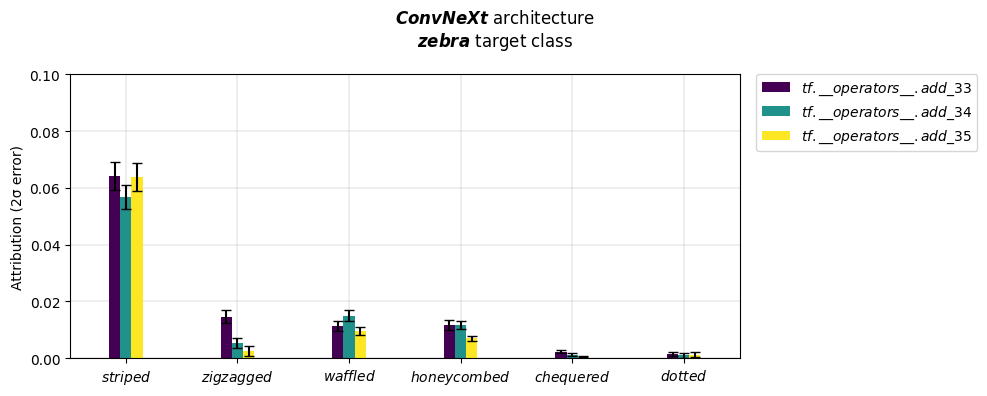

+---------------------------------------------------------------------------------------+
|                     Model: ConvNeXt; Class: zebra; Examples: zebra                    |
+-------------+-------------------------+---------------------+-------------------------+
|   Concept   |          Layer          |     Attrib. mean    |    Attrib. 95.45% CI    |
+-------------+-------------------------+---------------------+-------------------------+
|   striped   | tf.__operators__.add_33 |   0.0641 +- 0.0177  |   ['0.0591', '0.0691']  |
|             | tf.__operators__.add_34 |   0.0567 +- 0.0149  |   ['0.0524', '0.0609']  |
|             | tf.__operators__.add_35 |   0.0639 +- 0.0174  |   ['0.059', '0.0688']   |
|  zigzagged  | tf.__operators__.add_33 |  0.0147 +- 0.00804  |   ['0.0124', '0.017']   |
|             | tf.__operators__.add_34 |  0.00532 +- 0.00635 |  ['0.00353', '0.00712'] |
|             | tf.__operators__.add_35 |  0.00265 +- 0.00611 | ['0.000923', '0.00438'] |
|   waffle

In [14]:
# Plot results of the Global Explainer
global_visual_tcav.plot()

# Show the table with trhe results of the Global Explainer
global_visual_tcav.statsInfo()